# Import are required libraries

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
files = [file for file in os.listdir('C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//csse_covid_19_daily_reports')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//csse_covid_19_daily_reports//"+file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//all_data.csv",float_format='%.f', index=False)

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


# Data Prepping

## Task1: Remove unnecessary Columns

In [3]:
all_months_data = pd.read_csv("C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//all_data.csv")
all_months_data = all_months_data.drop(['Admin2', 'Combined_Key', 'Lat', 'Latitude', 'Long_', 'Longitude','FIPS', 'Province_State', 'Province/State'], axis=1)

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,8,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Task2: Converting Dates to pandas datetime

In [4]:
all_months_data['Last_Update'] = pd.to_datetime(all_months_data['Last_Update'])
all_months_data['Last Update'] = pd.to_datetime(all_months_data['Last Update'])

## Task3: Extracting the Month and Day to new columns

In [5]:
all_months_data['Month'] = all_months_data['Last Update'].dt.month
all_months_data['Month'] = all_months_data['Last_Update'].dt.month
all_months_data['Day'] = all_months_data['Last Update'].dt.day
all_months_data['Day'] = all_months_data['Last_Update'].dt.day

## Task4: Converting to desired data type

In [6]:
all_months_data['Active'] = pd.to_numeric(all_months_data['Active'])
all_months_data['Confirmed'] = pd.to_numeric(all_months_data['Confirmed'])
all_months_data['Deaths'] = pd.to_numeric(all_months_data['Deaths'])
all_months_data['Recovered'] = pd.to_numeric(all_months_data['Recovered'])
all_months_data['Month'].fillna('0', inplace=True)
all_months_data['Month'] = pd.to_numeric(all_months_data['Month'].apply(np.int64))
all_months_data['Month'] = all_months_data['Month'].apply(lambda x: calendar.month_abbr[x])
all_months_data['Day'] = pd.to_numeric(all_months_data['Day'])

## Task5: Creating new columns as required for daily figures
##             Combining the Last Update and Last_Update columns into Date column. 
##             Dropping columns after combining
##             Exporting data as checkpoint

In [7]:
all_months_data.fillna('0', inplace=True)
all_months_data['Date'] = all_months_data['Last Update'].astype(str) + all_months_data['Last_Update'].astype(str)
all_months_data = all_months_data.drop(['Last Update', 'Last_Update'], axis=1)
all_months_data.to_csv("C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//updated.csv", index=False)
# india_df = all_months_data[all_months_data['Country_Region'] == 'India'].reset_index(drop=True)
# india_df['Daily_Active'] = india_df['Active'].diff()
# india_df['Daily_Confirmed'] = india_df['Confirmed'].diff()
# india_df['Daily_Deaths'] = india_df['Deaths'].diff()
# india_df['Daily_Recovered'] = india_df['Recovered'].diff()
# india_df.head()

## Task6: Reading in the exported data to work with

In [8]:
updatedata = pd.read_csv("C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//updated.csv")

C:\Users\dell\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Task7: Creating Country column from two columns(Country/Region and Country_Region)

In [9]:
updatedata['Country'] = updatedata['Country/Region'].astype(str) + updatedata['Country_Region'].astype(str)

## Task8: Dropping the merged columns

In [10]:
updatedata = updatedata.drop(['Country/Region', 'Country_Region'], axis=1)

In [11]:
updatedata.head()

,Active,Confirmed,Deaths,Recovered,Month,Day,Date,Country
0,0.0,1.0,0.0,0.0,NaN,0.0,2020-01-22 17:00:000,Mainland China0
1,0.0,14.0,0.0,0.0,NaN,0.0,2020-01-22 17:00:000,Mainland China0
2,0.0,6.0,0.0,0.0,NaN,0.0,2020-01-22 17:00:000,Mainland China0
3,0.0,1.0,0.0,0.0,NaN,0.0,2020-01-22 17:00:000,Mainland China0
4,0.0,0.0,0.0,0.0,NaN,0.0,2020-01-22 17:00:000,Mainland China0


## Task9: Changing the country column value to make it uniform

In [12]:
updatedata.loc[updatedata['Country'] == 'Mainland China0', 'Country'] = 'China'
updatedata['Country'] = updatedata['Country'].str.strip('0')
updatedata.to_csv('C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//final.csv', float_format='%.f', index=False)

# Analysing the data

### Task1: Reading the final dataset

In [13]:
all_data = pd.read_csv('C://Users//dell//Downloads//Data Science//Projects//COVID-19//csse_covid_19_data//final.csv')
all_data.head()
# dailyconfirmeddf = all_months_data.groupby('Country_Region').sum()['Daily_Confirmed']
# dailyconfirmeddf

,Active,Confirmed,Deaths,Recovered,Month,Day,Date,Country
0,0,1,0,0,NaN,0,2020-01-22 17:00:000,China
1,0,14,0,0,NaN,0,2020-01-22 17:00:000,China
2,0,6,0,0,NaN,0,2020-01-22 17:00:000,China
3,0,1,0,0,NaN,0,2020-01-22 17:00:000,China
4,0,0,0,0,NaN,0,2020-01-22 17:00:000,China


In [14]:
indiadf = all_data.loc[all_data['Country'] == 'India'].reset_index(drop=True)
indiadf.tail()
#sns.relplot(x='Active', y='Deaths', hue='Recovered', data=india_df)

,Active,Confirmed,Deaths,Recovered,Month,Day,Date,Country
100,41406,62808,2101,19301,May,10,02020-05-10 02:32:30,India
101,43980,67161,2212,20969,May,11,02020-05-11 02:32:30,India
102,45925,70768,2294,22549,May,12,02020-05-12 03:32:27,India
103,47457,74292,2415,24420,May,13,02020-05-13 03:32:26,India
104,49104,78055,2551,26400,May,14,02020-05-14 03:32:28,India


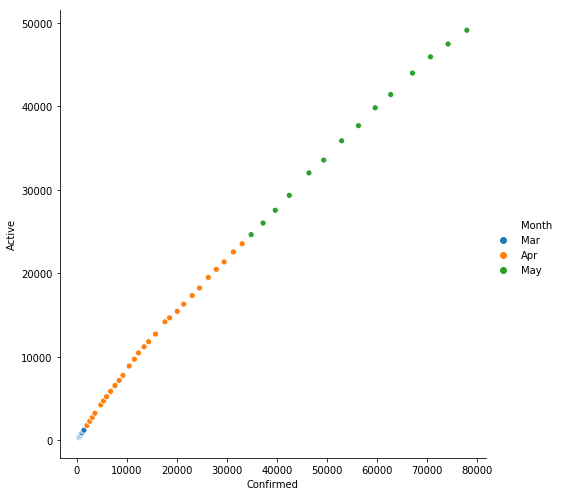

In [15]:
sns.relplot(x='Confirmed', y='Active', hue='Month', height= 7, data=indiadf)

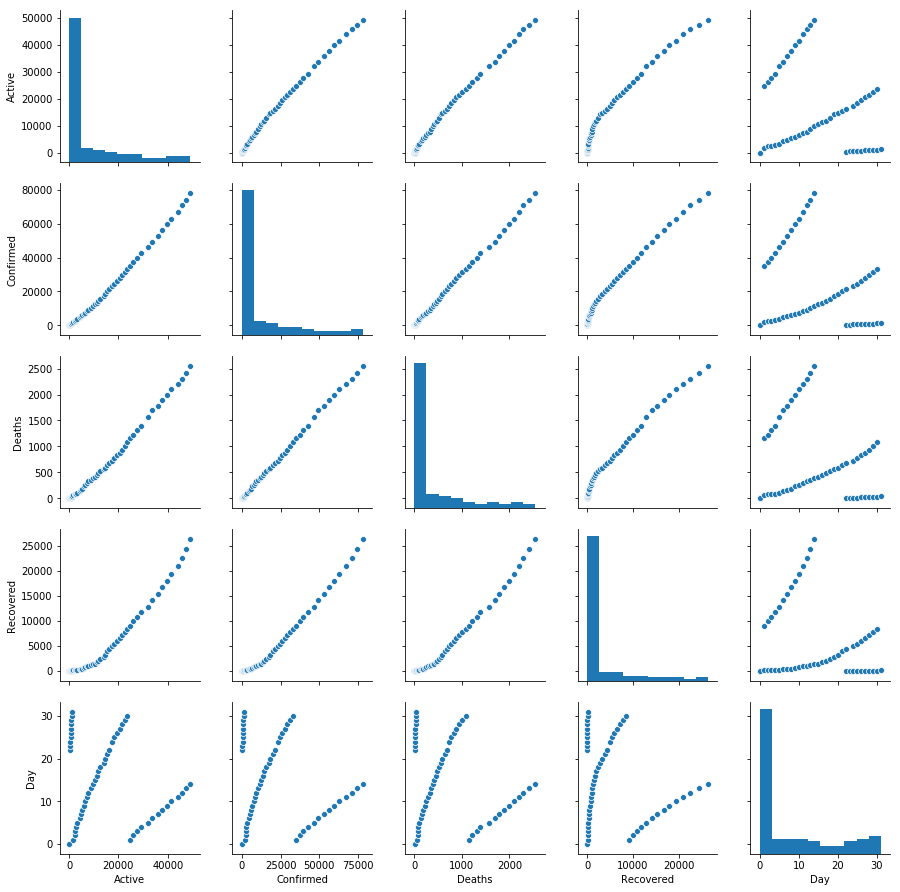

In [16]:
sns.pairplot(indiadf)

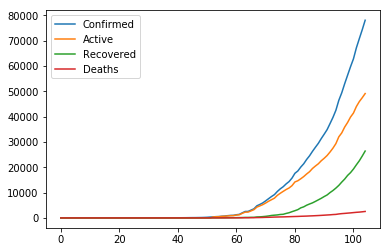

In [42]:
india_month = indiadf[['Month','Country','Confirmed', 'Active', 'Recovered', 'Deaths']]
# india_month.plot(figsize=(10,5))
#india_month['Month'].fillna('Feb',inplace=True)
monthda = india_month.groupby('Country')
months = [month for month, df in monthda]
# # india_month.plot(months,india_month['Confirmed'], figsize=(10,5))
# # india_month.set_index(['Month'], inplace=True)
# india_month.plot(xticks=(india_month['Month']),figsize=(10,5))
# # india_month.index
# india_month['Month']
# india_month.plot(xticks=india_month.Month)
#india_month['Month'].astype(str, inplace=True)
india_month.plot()

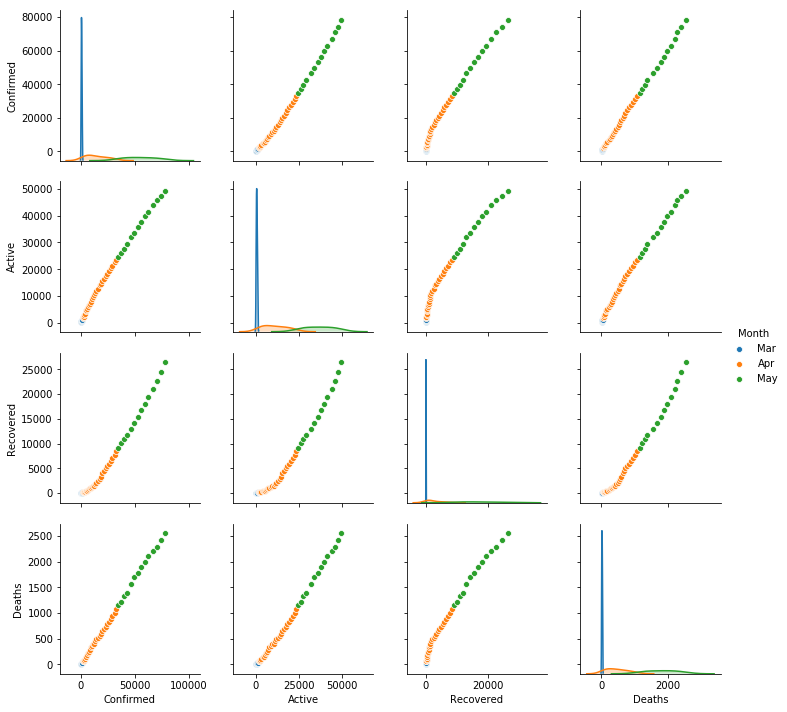

In [38]:
# with sns.axes_style("white"):
#     sns.jointplot(x=india_month['Confirmed'], y=india_month['Active'], kind="hex", color="k");
    
sns.pairplot(india_month, hue='Month')

ValueError: x and y must have same first dimension, but have shapes (1,) and (105,)

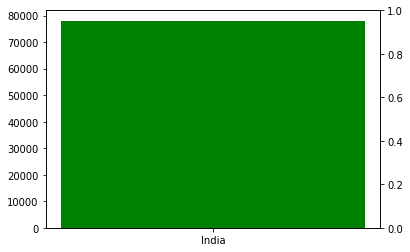

In [43]:


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(months, india_month['Confirmed'], color='g')
ax2.plot(months, india_month['Recovered'], 'b-')

ax1.set_xlabel('Months')
ax1.set_ylabel('Confirmed', color='g')
ax2.set_ylabel('Recovered', color='b')
ax1.set_xticklabels(months, rotation='vertical', size=8)
plt.show()


# Lets look at Italy Data

In [ ]:
italy_df = all_months_data[all_months_data['Country_Region'] == 'Italy'].reset_index(drop=True)
italy_df = italy_df.drop(['FIPS', 'Province_State'], axis=1)
italy_df.sort_values('Last_Update')

## Adding Month and Day column to the master dataset 

In [ ]:
all_months_data['Month'] = all_months_data['Last_Update'].dt.month
all_months_data['Day'] = all_months_data['Last_Update'].dt.day

In [ ]:
italymonths = italy_df.groupby('Month')
italymonths.sum()

In [ ]:
sns.pairplot(italy_df)

In [ ]:
sns.relplot(x='Confirmed', y='Recovered', hue='Deaths', height=7, data=italy_df)

In [ ]:
countries = all_months_data.groupby('Country_Region').sum()
countries = countries.sort_values('Confirmed', ascending=False)
countries.head()

In [ ]:
sns.relplot(x='Active', y='Recovered', height=7, data=countries)

In [ ]:
countries1 = [country for country, df in all_months_data.groupby('Country_Region')]
plt.figure(figsize=(20,10))
plt.bar(countries1, countries['Active'])
plt.xticks(countries1, rotation='vertical', size=8)
plt.xlabel('Countries')
plt.ylabel('Active Cases')
plt.show()

In [ ]:
sns.catplot(x='Recovered', y='Active', height=10, data=countries)

In [ ]:
all_months_data.head()